In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset'

# Check if the directory exists
if os.path.exists(dataset_path):
    print(f"Contents of '{dataset_path}':")
    for item in os.listdir(dataset_path):
        print(item)
else:
    print(f"The directory '{dataset_path}' does not exist. Please check the path.")

Contents of '/content/drive/MyDrive/Colab Notebooks/dataset':
CFUs.csv
Aggregation.csv
Resistance.csv
readme.txt
Extrahost_survival.csv
Growth.csv
Growth_curves.csv
Cation_supplementation.csv


# Importacion del dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_extrahost_survival = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Extrahost_survival.csv', sep=',')

In [ ]:
display(df_extrahost_survival.head())

,Media,Phage,PFU
0,LB,T4,5400
1,LB,lambda,6000
2,LB,T7,2200
3,LB,T4,5100
4,LB,lambda,4600


In [ ]:
# Get unique phages from the DataFrame
unique_phages = df_extrahost_survival['Phage'].unique()

print(unique_phages)

['T4' 'lambda' 'T7']


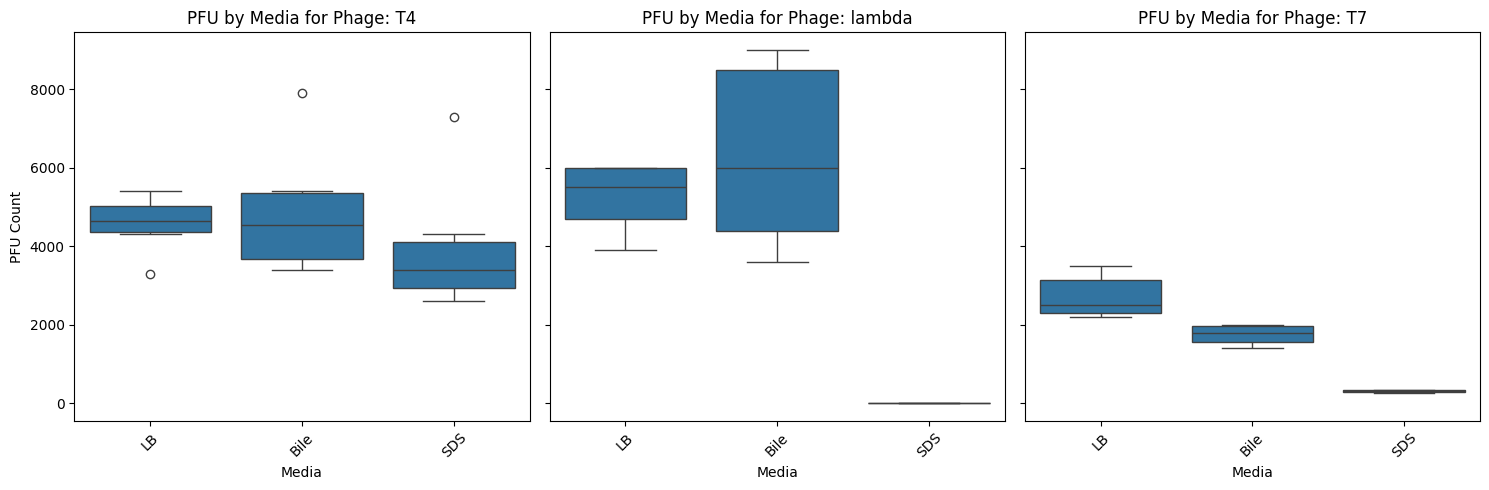

In [ ]:

# Create a figure and a set of subplots. Adjust figsize as needed.
# Using len(unique_phages) to dynamically create columns based on the number of phages
fig, axes = plt.subplots(1, len(unique_phages), figsize=(15, 5), sharey=True)

# Ensure axes is an iterable even if there's only one subplot
if len(unique_phages) == 1:
    axes = [axes]

# Iterate through each unique phage to create a subplot
for i, phage in enumerate(unique_phages):
    # Filter the DataFrame for the current phage
    df_filtered = df_extrahost_survival[df_extrahost_survival['Phage'] == phage]

    # Create a box plot on the current subplot
    sns.boxplot(x='Media', y='PFU', data=df_filtered, ax=axes[i])
    axes[i].set_title(f'PFU by Media for Phage: {phage}')
    axes[i].set_xlabel('Media')

    # Set y-axis label only for the first subplot to avoid redundancy
    if i == 0:
        axes[i].set_ylabel('PFU Count')
    else:
        axes[i].set_ylabel('') # Remove y-label for subsequent subplots

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
from scipy import stats

# Get unique phages from the DataFrame
unique_phages = df_extrahost_survival['Phage'].unique()

# Define the media types for comparison
media_types = ['LB', 'Bile', 'SDS']

print("--- T-Test Results ---")

for phage in unique_phages:
    print(f"\nPhage: {phage}")
    # Filter data for the current phage
    df_phage = df_extrahost_survival[df_extrahost_survival['Phage'] == phage]

    # Dictionary to hold PFU data for each media type
    phage_media_data = {}
    for media in media_types:
        data = df_phage[df_phage['Media'] == media]['PFU'].dropna()
        if len(data) > 1: # Need at least 2 samples for a t-test
            phage_media_data[media] = data
        else:
            print(f"  Not enough data for {media} to perform a t-test for Phage {phage}.")

    # Perform pairwise t-tests if enough data exists
    if len(phage_media_data) >= 2:
        media_keys = list(phage_media_data.keys())
        for i in range(len(media_keys)):
            for j in range(i + 1, len(media_keys)):
                media1 = media_keys[i]
                media2 = media_keys[j]

                if media1 in phage_media_data and media2 in phage_media_data:
                    data1 = phage_media_data[media1]
                    data2 = phage_media_data[media2]

                    if len(data1) > 1 and len(data2) > 1:
                        t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False) # Welch's t-test assuming unequal variances
                        print(f"  {media1} vs {media2}: T-statistic = {t_stat:.3f}, P-value = {p_val:.3f}")
                    else:
                        print(f"  Skipping t-test for {media1} vs {media2} due to insufficient data.")
    else:
        print(f"  Not enough distinct media types with sufficient data to perform t-tests for Phage {phage}.")

print("\n--- Interpretation ---")
print("A small p-value (typically < 0.05) suggests a statistically significant difference between the means of the two groups. A large p-value suggests no significant difference.")

--- T-Test Results ---

Phage: T4
  LB vs Bile: T-statistic = -0.443, P-value = 0.672
  LB vs SDS: T-statistic = 0.778, P-value = 0.463
  Bile vs SDS: T-statistic = 0.943, P-value = 0.368

Phage: lambda
  LB vs Bile: T-statistic = -1.010, P-value = 0.349
  LB vs SDS: T-statistic = 14.387, P-value = 0.000
  Bile vs SDS: T-statistic = 6.468, P-value = 0.001

Phage: T7
  LB vs Bile: T-statistic = 3.838, P-value = 0.006
  LB vs SDS: T-statistic = 10.540, P-value = 0.000
  Bile vs SDS: T-statistic = 13.602, P-value = 0.000

--- Interpretation ---
A small p-value (typically < 0.05) suggests a statistically significant difference between the means of the two groups. A large p-value suggests no significant difference.
